<a href="https://colab.research.google.com/github/wdconinc/practical-computing-for-scientists/blob/master/Lectures/lecture29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lectures 29: Random Numbers and Monte Carlo Methods

<img src="https://imgs.xkcd.com/comics/random_number.png"/>

In [0]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import numpy.random as ran

## Previous episode

- Monte Carlo for integration

## How to generate deviates from a distribution of choice

### The transformation method

<img src="https://drive.google.com/uc?export=view&id=1mbxatKoUMqHaeH2240mjMxMe8rhGGoyy">

### The acceptance / rejection method

<img src="https://drive.google.com/uc?export=view&id=1FOYmnnw38sD4lKXeGjN0aA0tnYczNXp5">

## Monte Carlo integration

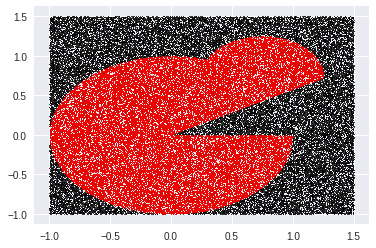

In [0]:
def f(x,y):
    return np.exp(-x**2 - x*y - y**2)

def inV(inx, iny):
    Vx=[]
    Vy=[]
    for i in range(len(inx)):
        x, y = inx[i], iny[i]
        r1 = np.sqrt(x**2 + y**2)
        r2 = np.sqrt((x-0.75)**2 + (y-0.75)**2)
        theta = np.arctan(y/x)
        max_theta = math.pi/6.0
        angular_region = x>0 and y>0 and theta<max_theta
        if (r1<1 or r2<0.5) and not(angular_region):
            Vx.append(x)
            Vy.append(y)
    return np.array(Vx), np.array(Vy)

NW = 100000
Wx = ran.rand(NW)*5/2 - 1 
Wy = ran.rand(NW)*5/2 - 1
plt.plot(Wx, Wy, "ok", ms = 1)
Vx, Vy = inV(Wx, Wy)
plt.plot(Vx, Vy, ".r", ms = 2)

In [0]:
NV = len(Vx)
Warea = (5/2)**2
Varea = NV/NW * Warea 
favg = np.sum(f(Vx,Vy)) / NV
f2avg = np.sum(f(Vx,Vy)**2) / NV
stddev = np.sqrt(f2avg - favg**2) / np.sqrt(NV)
print("Integral: %f +/- %f" % (favg*Varea, stddev*Varea))

Integral: 1.913142 +/- 0.003741


### Exercise: Monte Carlo integration

Determine the integral of $f(x,y) = f(r,\theta) = \sqrt{x^2 + y^2} = r$ over the unit circle using Monte Carlo techniques.

Integral: 2.098921 +/- 0.002645


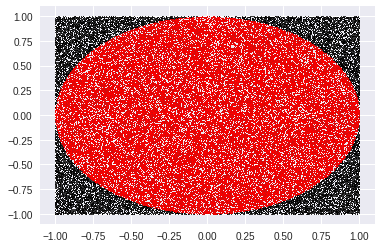

In [0]:
def f(x,y):
  return np.sqrt(x**2 + y**2)

def inV(inx, iny):
    Vx=[]
    Vy=[]
    for i in range(len(inx)):
        x, y = inx[i], iny[i]
        r = np.sqrt(x**2 + y**2)
        if (r<1):
            Vx.append(x)
            Vy.append(y)
    return np.array(Vx), np.array(Vy)

# Plot points
NW = 100000
Wx = ran.rand(NW)*2 - 1 
Wy = ran.rand(NW)*2 - 1
plt.plot(Wx, Wy, "ok", ms = 1)
Vx, Vy = inV(Wx, Wy)
plt.plot(Vx, Vy, ".r", ms = 2)

# Calculate integral
NV = len(Vx)
Warea = 2**2
Varea = NV/NW * Warea 
favg = np.sum(f(Vx,Vy)) / NV
f2avg = np.sum(f(Vx,Vy)**2) / NV
stddev = np.sqrt(f2avg - favg**2) / np.sqrt(NV)
print("Integral: %f +/- %f" % (favg*Varea, stddev*Varea))

In [0]:
(0.000836/0.002646)**-1

3.165071770334928

In [0]:
np.sqrt(10)

3.1622776601683795

## Monte Carlo error analysis

In [0]:
import scipy.optimize as opt

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

filename = '/content/gdrive/Team Drives/Practical Computing for Scientists (PHYS 256)/Week 12/two_photon_all.dat'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# read in data using the numpy parser
data = np.genfromtxt(filename, delimiter=' ')
position = data[:,0]
current = data[:,1]
counts = data[:,2]

# make an array to hold the errors
# each is the sqrt() of the number of counts
counts_err = np.sqrt(counts)
current_err = 0.03

<Container object of 3 artists>

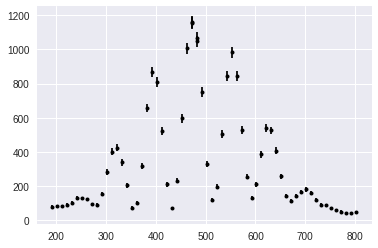

In [0]:
# plot the number of counts
plt.errorbar(position, counts, yerr = counts_err, marker = 'o', color = 'black', linestyle = 'None', ms = 4)

<Container object of 3 artists>

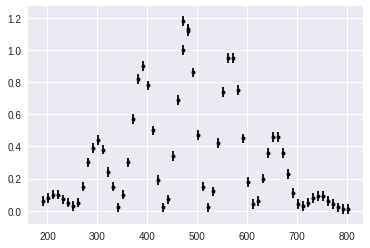

In [0]:
#plot the current
plt.errorbar(position, current, current_err, None, 'ok', label = 'data', ms = 4)

In [0]:
# define the two slit function
# uses numpy universal functions which take arrays as arguments
# http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs
def double_slit(x, b, I0, x0, d, a, c = 94.16):
    epsilon = 1e-6
    return b+I0*np.power(np.cos(c*d*(x-x0)),2.0)*np.power(np.sin(c*a*(x-x0))-epsilon,2.0)/np.power(c*a*(x-x0)-epsilon,2.0)

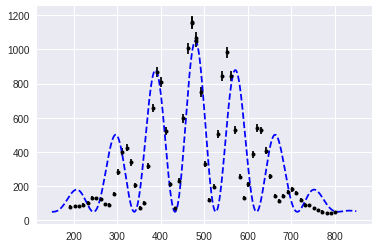

In [0]:
# plot the number of counts
plt.errorbar(position, counts, yerr = counts_err, marker = 'o', color = 'black', linestyle = 'None', ms = 4)

# now draw the two slit function
x = np.linspace(150, 850, num = 1000)

pnames = ['b','I0','x0','d','a']

# initial guess at the parameters
p0 = [50,1000,480,3.56e-4,8.5e-5]
y = double_slit(x,p0[0],p0[1],p0[2],p0[3],p0[4])

# plot the initial guess
plt.plot(x, y, 'b--', label = 'initial guess')

In [0]:
# now we want to do a fit of the function to the data
# this is an optimization problem where you try to make some "error function" as small as possible
# the error function here is a chi-square
def error_function(p,xx,yy,eyy):
    b,I0,x0,d,a = p
    ff = double_slit(xx,b,I0,x0,d,a)
    rval = (ff - yy) / eyy
    return rval

In [0]:
# fit the counts
op,cov,infodict,errmess,success = opt.leastsq(error_function,p0,
                                              args=(position,counts,counts_err),
                                              factor=0.1,
                                              full_output=True)


chi2 = np.sum(error_function(op,position,counts,counts_err)**2)

print("chi2 =", chi2)
ndf = len(position) - len(p0)

print("ndf =", ndf)
for ipar in range(len(p0)):
  print("parameter %s = %f +/- %f" % (pnames[ipar],op[ipar],math.sqrt(cov[ipar,ipar])*chi2/ndf))

chi2 = 409.9093395082639
ndf = 59
parameter b = 71.360685 +/- 12.734743
parameter I0 = 1092.655685 +/- 74.089646
parameter x0 = 473.706144 +/- 0.991207
parameter d = 0.000420 +/- 0.000005
parameter a = 0.000110 +/- 0.000006


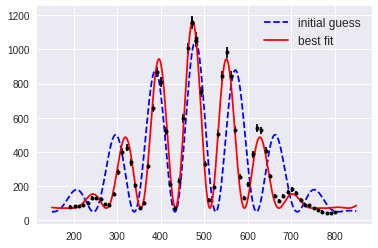

In [0]:
# plot the number of counts
plt.errorbar(position, counts, yerr = counts_err, marker = 'o', color = 'black', linestyle = 'None', ms = 4)

# plot the initial guess
plt.plot(x, y, 'b--', label = 'initial guess')

# plot with the fitted parameters
plt.plot(x,double_slit(x,op[0],op[1],op[2],op[3],op[4]),'r-',label='best fit')

plt.legend(loc='upper right',fontsize=12)

### Construct a random pseudo experiment

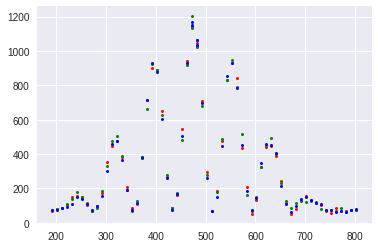

In [0]:
class random_doubleslit:
    ''' generate a random pseudo-experiment for the double-slit experiment.
        works for the counting experiment only
    '''
    def __init__(self,positions,pars):
        self.positions = positions
        self.pars = pars
        self.r = ran.RandomState() # the random number generator
    def double_slit(self,x,b,I0,x0,d,a,c=94.16):
        epsilon = 1e-6
        return b+I0*np.power(np.cos(c*d*(x-x0)),2.0)*\
            np.power(np.sin(c*a*(x-x0))-epsilon,2.0)/np.power(c*a*(x-x0)-epsilon,2.0)
    def get_experiment(self):
        # loop over positions generating new data at each
        counts = np.zeros_like(self.positions)
        for i,x in enumerate(self.positions):
            N = double_slit(x,self.pars[0],self.pars[1],\
                          self.pars[2],self.pars[3],self.pars[4])
            counts[i] = self.r.poisson(N)
        return counts

rds = random_doubleslit(position,op)

plt.plot(position, rds.get_experiment(), "or", ms = 3)
plt.plot(position, rds.get_experiment(), "og", ms = 3)
plt.plot(position, rds.get_experiment(), "ob", ms = 3)

### Now, fit an ensemble of pseudo experiments

In [0]:
Nexp = 1000
many_pars = np.empty((Nexp, len(op)))
for i in range(Nexp):
    cnts = rds.get_experiment()
    cnts_err = np.sqrt(cnts)
    result = opt.leastsq(error_function,op,args=(position,cnts,cnts_err),factor=0.1,full_output=True)
    pars = result[0]
    many_pars[i] = pars
print(many_pars[::100])

[[7.26942645e+01 1.10559764e+03 4.73521102e+02 4.19580178e-04
  1.10600748e-04]
 [6.88519653e+01 1.08929062e+03 4.73568830e+02 4.20685058e-04
  1.08560148e-04]
 [7.27967921e+01 1.08669959e+03 4.73657322e+02 4.19717073e-04
  1.10408552e-04]
 [7.28175525e+01 1.09246287e+03 4.73749242e+02 4.20008468e-04
  1.10252557e-04]
 [6.89768662e+01 1.09264151e+03 4.73635742e+02 4.19643381e-04
  1.09307776e-04]
 [7.12088200e+01 1.09072703e+03 4.73744171e+02 4.18717148e-04
  1.10240734e-04]
 [6.85349707e+01 1.08381068e+03 4.73704674e+02 4.19868725e-04
  1.09712266e-04]
 [6.98003763e+01 1.09146556e+03 4.73753604e+02 4.20358708e-04
  1.09381129e-04]
 [7.11052544e+01 1.07365755e+03 4.73832418e+02 4.20845735e-04
  1.09007770e-04]
 [7.12250009e+01 1.08345856e+03 4.73528187e+02 4.19173655e-04
  1.09960182e-04]]


### Compute mean and variance and histogram the output

Check if the standard devaition of the fitted parameters agrees with the error estimate taken from the fit to the data.

Parameter means: [7.04588980e+01 1.09293908e+03 4.73708395e+02 4.20057845e-04
 1.09831814e-04]
Parameter standard deviations: [1.86646728e+00 1.01930869e+01 1.38941218e-01 6.44614879e-07
 8.23099274e-07]


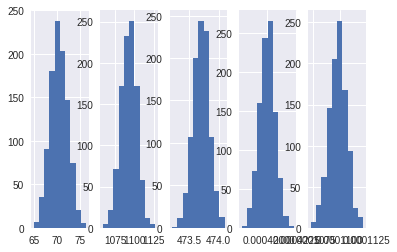

In [0]:
print("Parameter means:", np.mean(many_pars,0)) # second parameter is the axis over which to compute the mean
print("Parameter standard deviations:", np.sqrt(np.var(many_pars,0)))
fig, ax = plt.subplots(1,5)
for i in range(5):
  ax[i].hist(many_pars[:,i]);